**# Import data set with kaggle**

In [4]:
%%bash
pip install kaggle
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json
kaggle datasets list
kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed
unzip traffic-signs-preprocessed.zip -d data
# mv ./data/annotations ./data/labels

bash: line 2: !mkdir: command not found
bash: line 3: !cp: command not found
bash: line 4: !chmod: command not found
bash: line 5: !kaggle: command not found
bash: line 6: !kaggle: command not found
bash: line 7: !unzip: command not found


CalledProcessError: Command 'b'pip install kaggle\n!mkdir ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!kaggle datasets list\n!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed\n!unzip traffic-signs-preprocessed.zip -d data\n# mv ./data/annotations ./data/labels\n'' returned non-zero exit status 127.

Import Required Libraries

In [5]:
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.applications import InceptionV3
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2

Loading Data

In [6]:
data = pd.read_pickle("./data/data8.pickle")
#Data processing
data.keys()

dict_keys(['y_validation', 'x_train', 'y_train', 'x_validation', 'labels', 'x_test', 'y_test'])

Checking the Shapes of the keys

In [7]:
print("x_test shape:", data["x_test"].shape)
print("y_test shape:", data["y_test"].shape)
print("x_train shape:", data["x_train"].shape)
print("y_train shape:", data["y_train"].shape)
print("x_validation shape:", data["x_validation"].shape)
print("y_validation shape:", data["y_validation"].shape)

x_test shape: (12630, 1, 32, 32)
y_test shape: (12630,)
x_train shape: (86989, 1, 32, 32)
y_train shape: (86989,)
x_validation shape: (4410, 1, 32, 32)
y_validation shape: (4410,)


In [8]:
x_train = data["x_train"]
y_train = data["y_train"]

x_test = data["x_test"]
y_test = data["y_test"]

x_validation = data["x_validation"]
y_validation = data["y_validation"]

In [9]:
x_train = x_train.swapaxes(1,2)
x_train.shape

(86989, 32, 1, 32)

In [10]:
x_train = x_train.swapaxes(2,3)
x_train.shape

(86989, 32, 32, 1)

In [11]:
x_validation = x_validation.swapaxes(1,2)
x_validation.shape

(4410, 32, 1, 32)

In [12]:
x_validation = x_validation.swapaxes(2,3)
x_validation.shape

(4410, 32, 32, 1)

In [13]:
x_test = x_test.swapaxes(1,2)
x_test.shape
x_test = x_test.swapaxes(2,3)
x_test.shape

(12630, 32, 32, 1)

Visualization data using pyplot

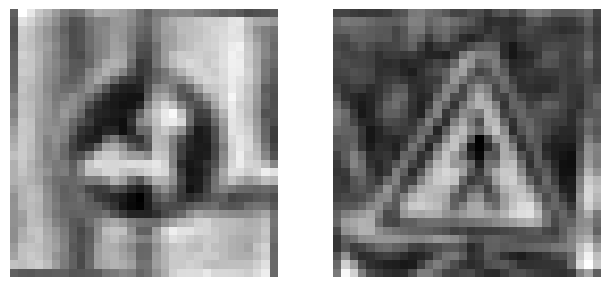

In [56]:
plt.figure(figsize=(16,16))

for i in  range(2):
  plt.subplot(4,4, i+1)
  plt.imshow(x_train[i], cmap = "gray")
  plt.axis("off")

plt.show()

Reshaping

In [15]:
def resize(img):
  numberOfImages = img.shape[0]
  new_ary = np.zeros((numberOfImages, 64, 64, 1))
  for i in range (numberOfImages):
    new_ary[i] = tf.image.resize(img[i], (64,64))
  return new_ary

In [16]:
x_train_resized = resize(x_train)
x_validation_resized = resize(x_validation)
x_test_resized = resize(x_test)
print("x_train_resized shape:", x_train_resized.shape)
print("x_validation_resized shape:", x_validation_resized.shape)
print("x_test_resized shape:", x_test_resized.shape)

x_train_resized shape: (86989, 64, 64, 1)
x_validation_resized shape: (4410, 64, 64, 1)
x_test_resized shape: (12630, 64, 64, 1)


# Define the model architecture

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(43, activation='softmax')
])

# Compile the model

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [19]:
history = model.fit(x_train_resized, y_train, epochs=10, validation_data=(x_validation_resized, y_validation))

Epoch 1/10
2719/2719 [==============================] - 566s 208ms/step - loss: 0.2508 - accuracy: 0.9336 - val_loss: 0.1487 - val_accuracy: 0.9621
Epoch 2/10
2719/2719 [==============================] - 510s 188ms/step - loss: 0.0367 - accuracy: 0.9898 - val_loss: 0.1073 - val_accuracy: 0.9764
Epoch 3/10
2719/2719 [==============================] - 521s 191ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.2311 - val_accuracy: 0.9705
Epoch 4/10
2719/2719 [==============================] - 518s 190ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.2148 - val_accuracy: 0.9685
Epoch 5/10
2719/2719 [==============================] - 508s 187ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0895 - val_accuracy: 0.9821
Epoch 6/10
2719/2719 [==============================] - 504s 185ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.1888 - val_accuracy: 0.9748
Epoch 7/10
2719/2719 [==============================] - 509s 187ms/step - loss: 0.0106 - accuracy: 0.9971 - val_

# Plot training and validation accuracy : Epoch | Accuracy

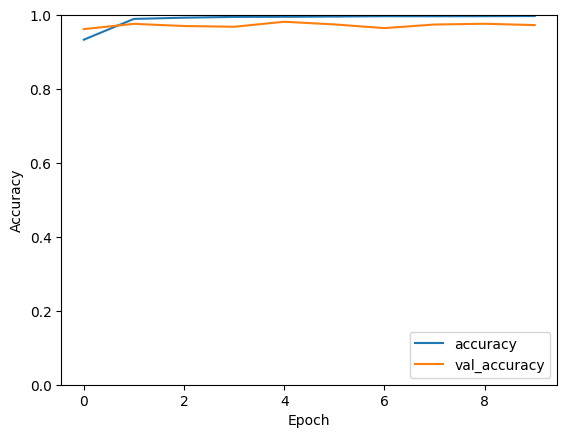

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Evaluating Training loss | Validation loss

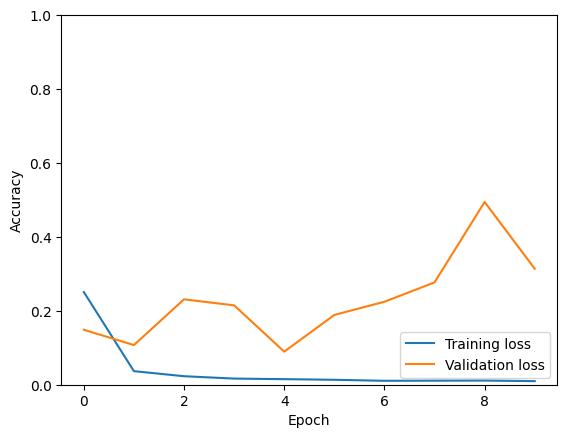

In [21]:
# plt.style.use('seaborn')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Evaluating Training accuracy | Validation accuracy

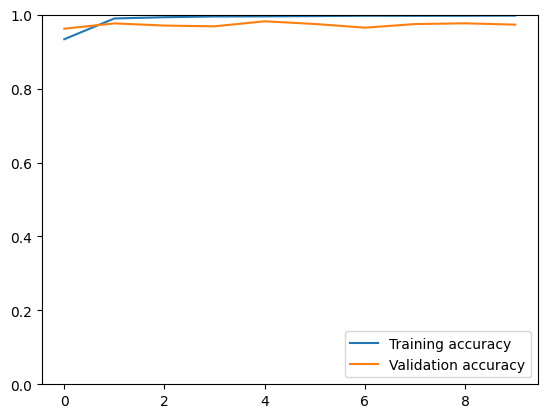

In [22]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="Validation accuracy")
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on test data

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test)
print('Test accuracy:', test_accuracy)

395/395 [==============================] - 21s 53ms/step - loss: 0.3718 - accuracy: 0.9614
Test accuracy: 0.9614410400390625


#Save the model to Google Drive

In [24]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
model.save("/content/gdrive/My Drive/roadSignModel.h5")

Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Map predicted class labels to traffic sign labels which taken from the CSV file

In [43]:
# Read the CSV file
sign_names_df = pd.read_csv("label_names.csv")

# Create a mapping between ClassId and SignName
class_id_to_sign_name = dict(zip(sign_names_df["ClassId"], sign_names_df["SignName"]))

# Print the mapping
print("Class ID to Sign Name mapping:")
for class_id, sign_name in class_id_to_sign_name.items():
    print(f"Class ID: {class_id}, Sign Name: {sign_name}")


Class ID to Sign Name mapping:
Class ID: 0, Sign Name: Speed limit (20km/h)
Class ID: 1, Sign Name: Speed limit (30km/h)
Class ID: 2, Sign Name: Speed limit (50km/h)
Class ID: 3, Sign Name: Speed limit (60km/h)
Class ID: 4, Sign Name: Speed limit (70km/h)
Class ID: 5, Sign Name: Speed limit (80km/h)
Class ID: 6, Sign Name: End of speed limit (80km/h)
Class ID: 7, Sign Name: Speed limit (100km/h)
Class ID: 8, Sign Name: Speed limit (120km/h)
Class ID: 9, Sign Name: No passing
Class ID: 10, Sign Name: No passing for vehicles over 3.5 metric tons
Class ID: 11, Sign Name: Right-of-way at the next intersection
Class ID: 12, Sign Name: Priority road
Class ID: 13, Sign Name: Yield
Class ID: 14, Sign Name: Stop
Class ID: 15, Sign Name: No vehicles
Class ID: 16, Sign Name: Vehicles over 3.5 metric tons prohibited
Class ID: 17, Sign Name: No entry
Class ID: 18, Sign Name: General caution
Class ID: 19, Sign Name: Dangerous curve to the left
Class ID: 20, Sign Name: Dangerous curve to the right
Cl

#Testing with actual road sign images

In [67]:
def preprocess_actual_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        img = cv2.resize(img, (64, 64))  # Resize image to match model input shape
        img = img.reshape((64, 64, 1))  # Reshape image to match model input shape
        images.append(img)
    return np.array(images)

#Define paths to actual road sign images
actual_image_paths = ["actual_images/1.jpg"]

#Preprocess actual road sign images
actual_images = preprocess_actual_images(actual_image_paths)

#Use the trained model to predict class labels of actual road sign images
predictions = model.predict(actual_images)


1/1 [==============================] - 0s 44ms/step


# Map predicted class labels to traffic sign labels using the sign name mapping

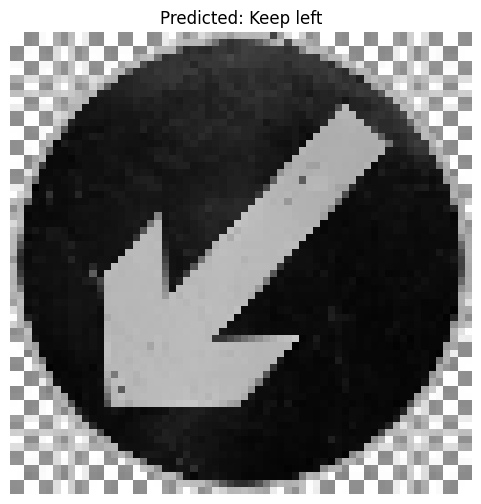

In [68]:
predicted_labels = [class_id_to_sign_name[np.argmax(prediction)] for prediction in predictions]

# Display the actual road sign images with their predicted labels
plt.figure(figsize=(6, 6))
for i in range(len(actual_images)):
    plt.subplot(1, len(actual_images), i + 1)
    plt.imshow(actual_images[i].reshape(64, 64), cmap='gray')
    plt.title("Predicted: " + predicted_labels[i])
    plt.axis('off')
plt.show()